# Project : Advanced House Price Prediction 

## Data Analysis [EDA]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/EDA Pratice/Advance House Price Prediction/train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


__Missing values__

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

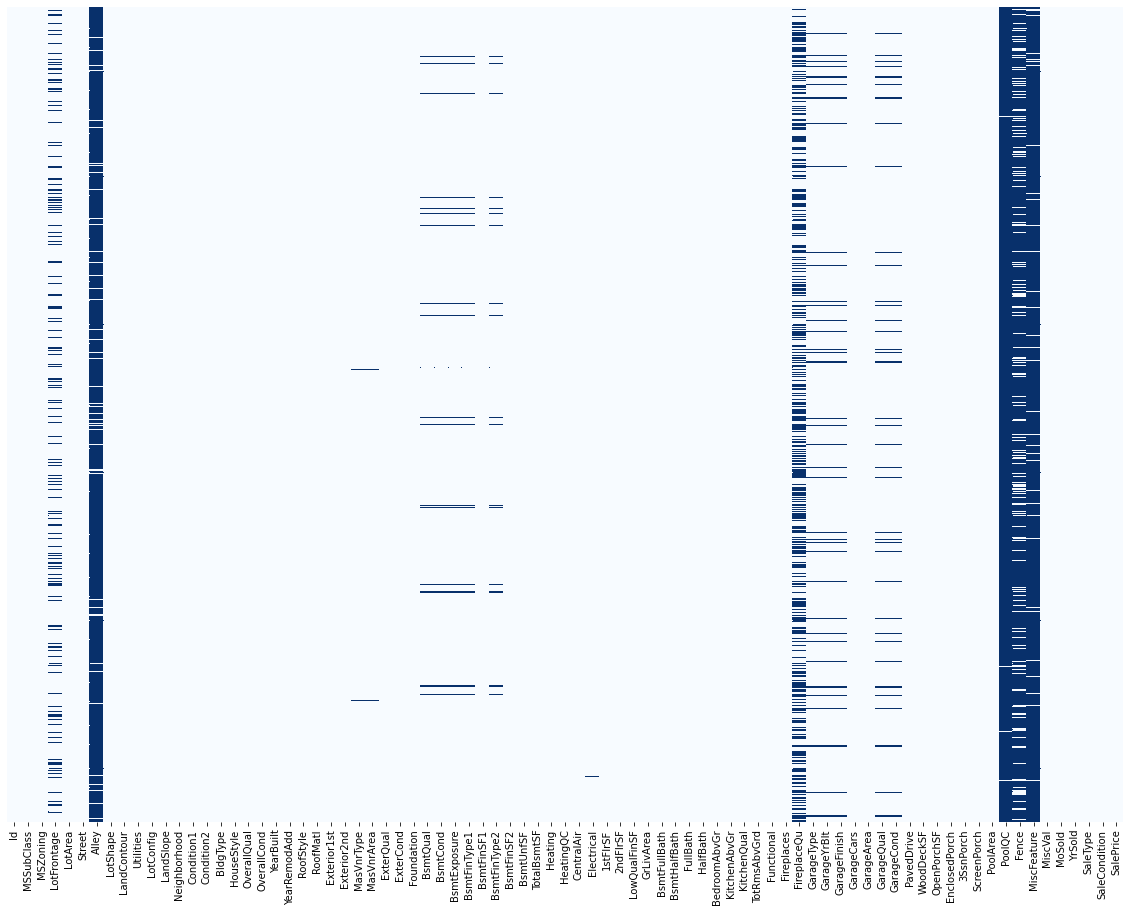

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Blues')

In [7]:
missing_values=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
print('Missing feature and the % of missing values are : ')
for feature in missing_values:
    print(f'{feature} : {np.round(df[feature].isnull().mean(),4)}')

Missing feature and the % of missing values are : 
LotFrontage : 0.1774
Alley : 0.9377
MasVnrType : 0.0055
MasVnrArea : 0.0055
BsmtQual : 0.0253
BsmtCond : 0.0253
BsmtExposure : 0.026
BsmtFinType1 : 0.0253
BsmtFinType2 : 0.026
Electrical : 0.0007
FireplaceQu : 0.4726
GarageType : 0.0555
GarageYrBlt : 0.0555
GarageFinish : 0.0555
GarageQual : 0.0555
GarageCond : 0.0555
PoolQC : 0.9952
Fence : 0.8075
MiscFeature : 0.963


Relation of missing values(independent features) wrt to target variable 'SalePrice'

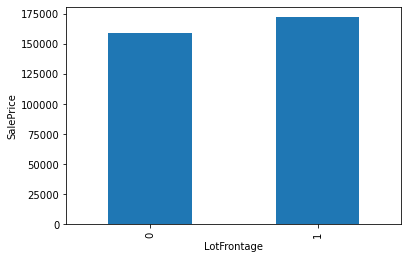

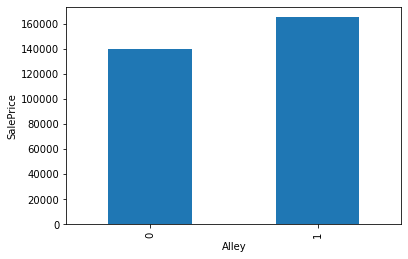

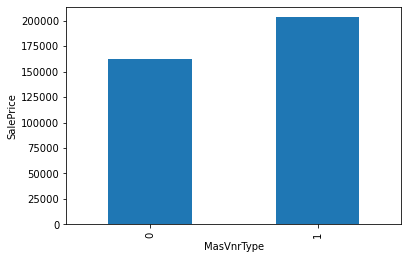

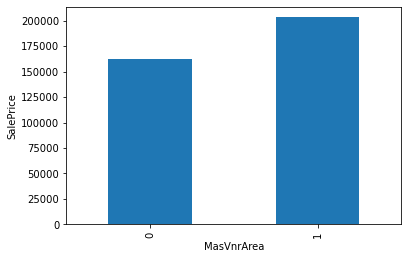

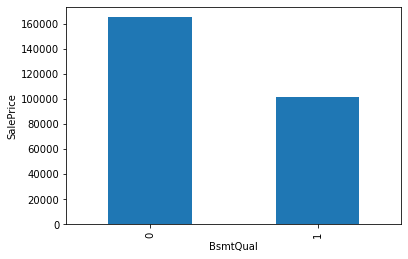

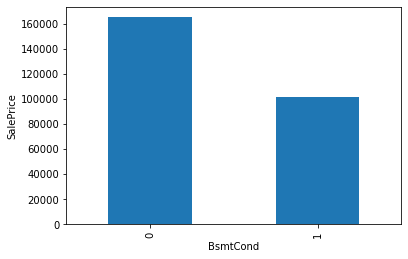

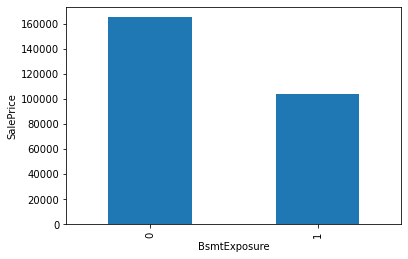

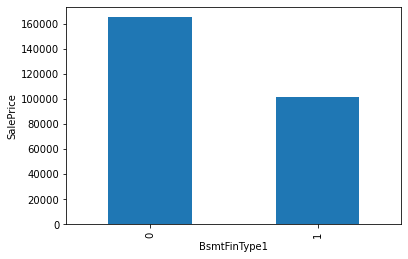

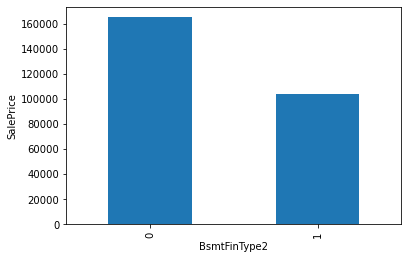

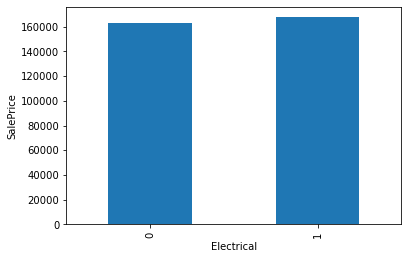

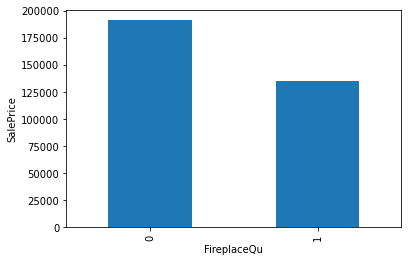

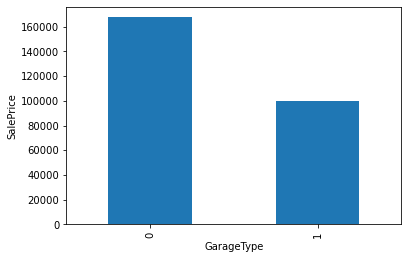

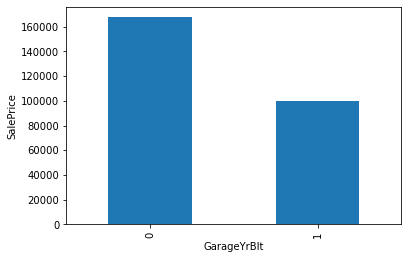

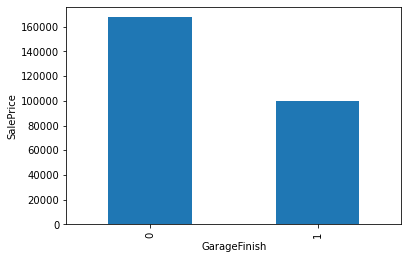

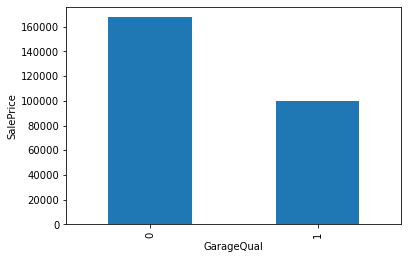

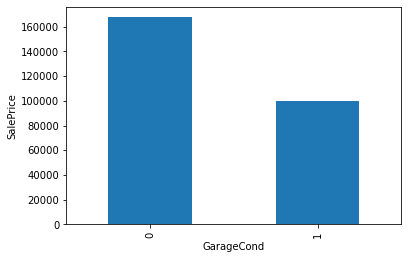

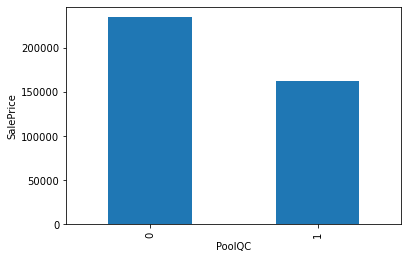

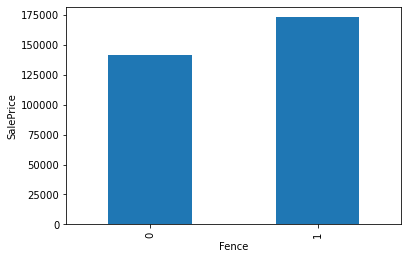

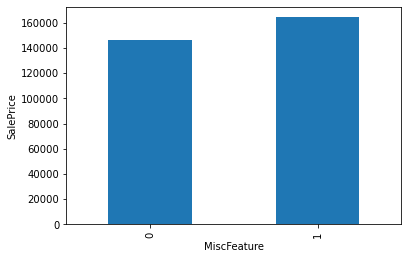

In [8]:
for feature in missing_values:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)    # will replace the missing values by 1 else 0
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

__Conclusion :__ The median/mean of missing value [1] is more than the non missing value [0] wrt target variable in most of the cases

That means the missing value has importance with respect to the target variable [SalePrice] and these nan values need to be replaced

__Numerical and Categorical features__

In [9]:
features_numerical=[feature for feature in df.columns if df[feature].dtypes!='O' and feature not in ['Id']]
print('The length of numerical features are : ',len(features_numerical))
print()
print(features_numerical)

The length of numerical features are :  37

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


__Temporal Features[Having date and time]__

In [10]:
feature_temporal=[feature for feature in features_numerical if 'Yr' in feature or 'Year' in feature]
print('The length of temporal features are : ',len(feature_temporal))
print()
print(feature_temporal)

The length of temporal features are :  4

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Analysing 'YrSold' wrt to the target variable [SalePrice]

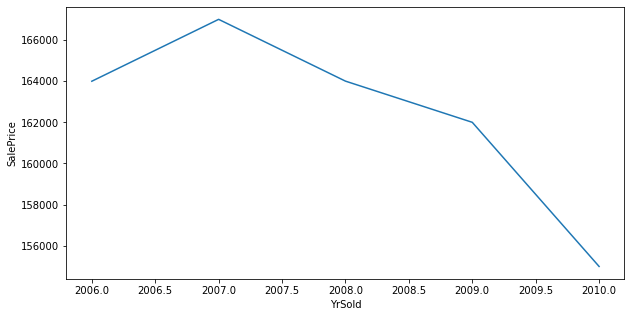

In [11]:
data=df.copy()
plt.figure(figsize=(10,5))
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

__Conclusion :__ As the year increasing the house price decreasing rather its value should be increasing 
What are the other factors that leads to this ?

More analysis of the temporal features 

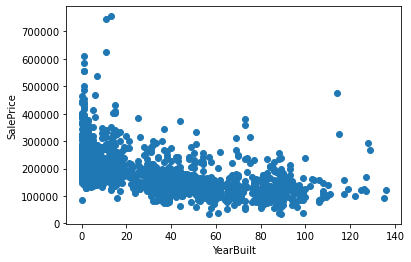

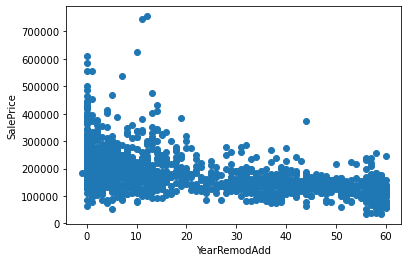

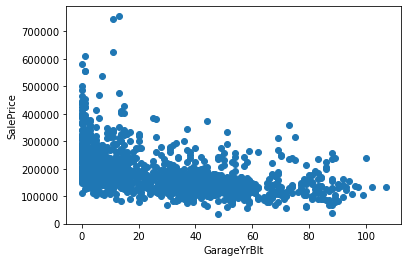

In [12]:
for feature in feature_temporal:
    data=df.copy()
    if(feature!='YrSold'):
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

__Conclusion :__ There are other factors that leads to the price of the house 
    
if 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' is less then the price of the house is more

else the price will decrease

__Discrete Numerical Feature__

In [13]:
feature_discrete_numerical=[feature for feature in features_numerical if len(df[feature].unique())<25 and feature not in feature_temporal+['Id']]
print('The length of discrete numerical features are : ',len(feature_discrete_numerical))
print()
print(feature_discrete_numerical)

The length of discrete numerical features are :  17

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


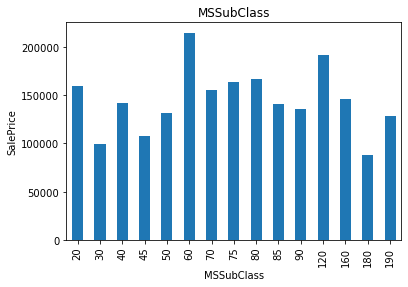

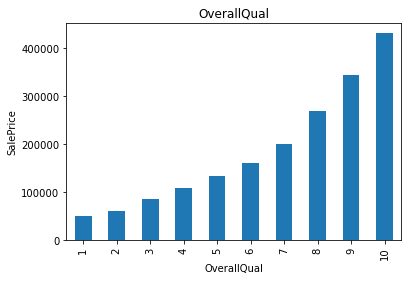

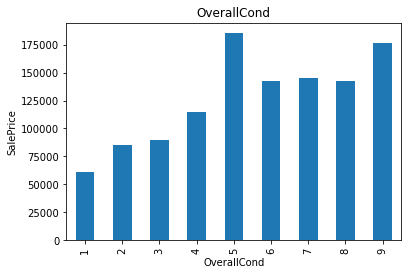

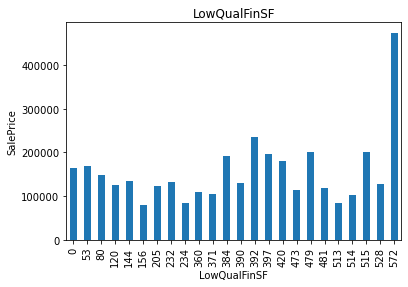

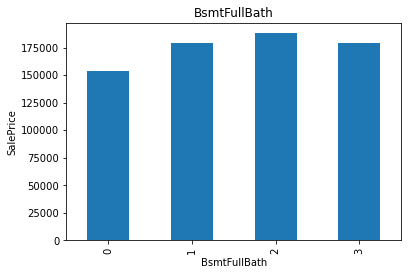

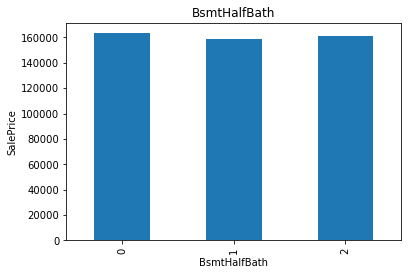

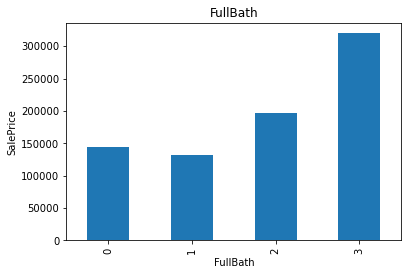

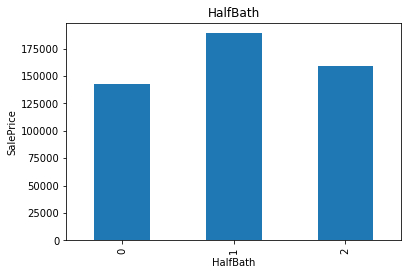

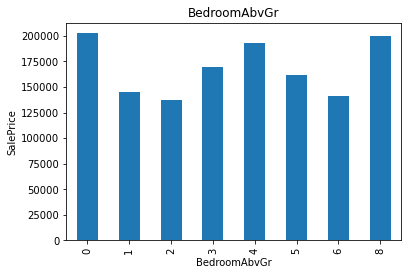

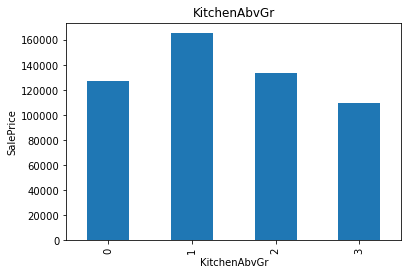

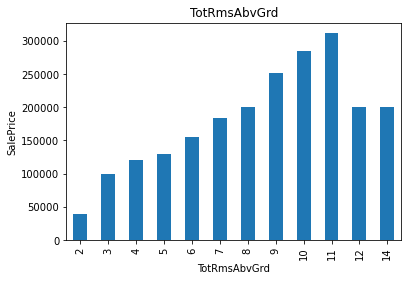

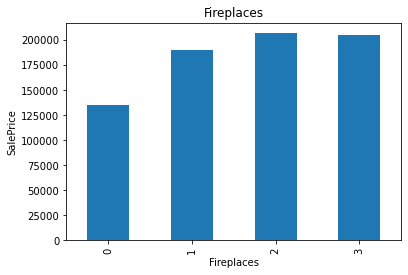

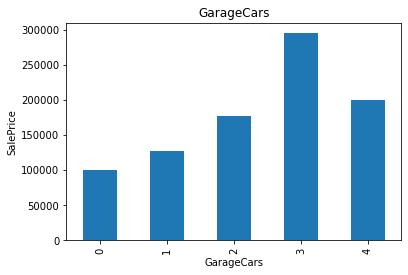

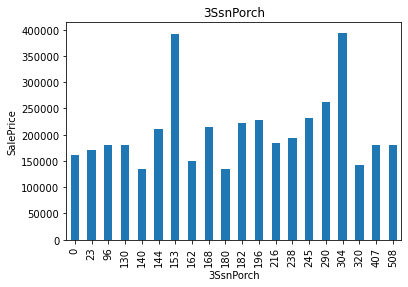

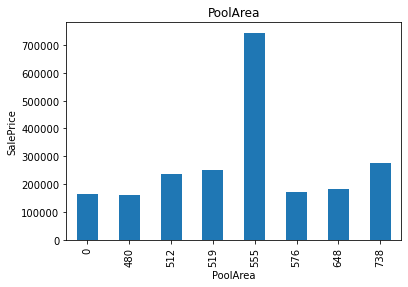

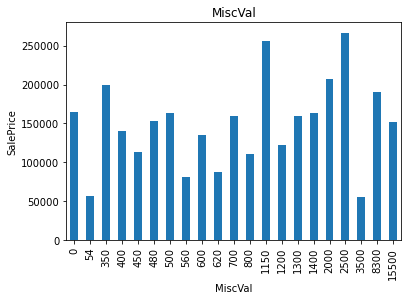

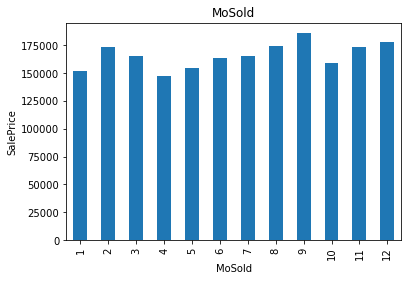

In [14]:
for feature in feature_discrete_numerical:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()   # as there are outliers in the data 
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

__Conclusion :__ Aanalysis the numerical discrete Features wrt to the target features 

So in this bar graphs we can analyse the different unique values of the particular features 
wrt to the target feature 

__Discrete Continuous Feature__

In [15]:
feature_continuous_numerical=[feature for feature in features_numerical if feature not in feature_discrete_numerical+feature_temporal+['Id']]
print('The length of discrete continuous features are : ',len(feature_discrete_numerical))
print()
print(feature_continuous_numerical)

The length of discrete continuous features are :  17

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


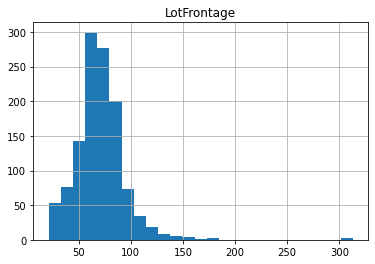

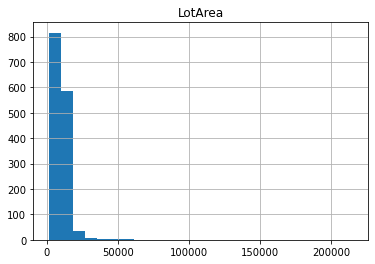

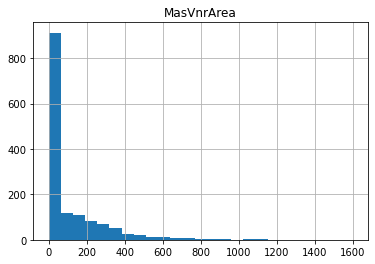

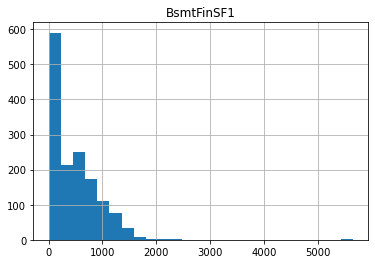

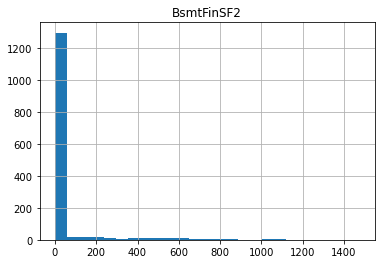

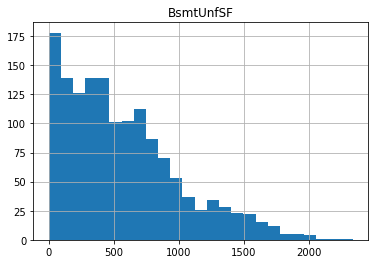

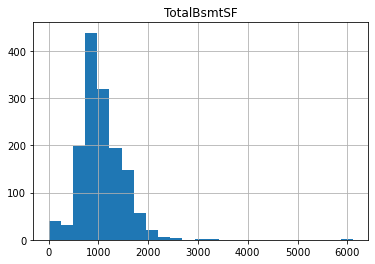

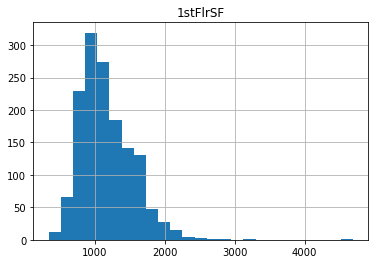

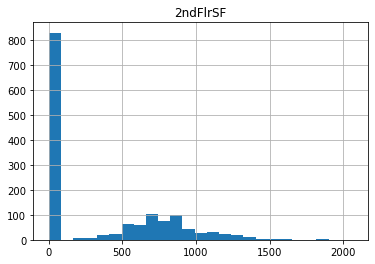

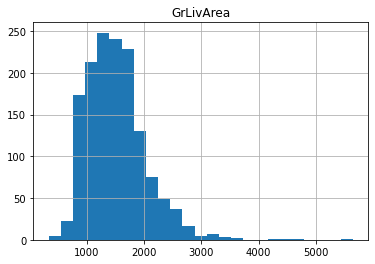

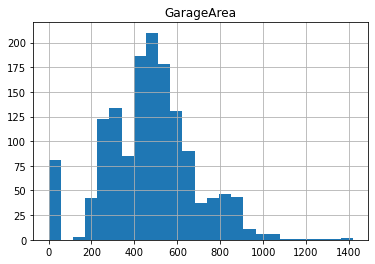

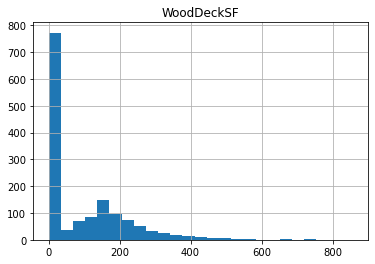

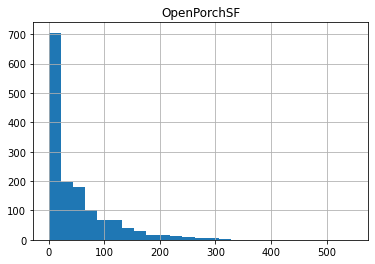

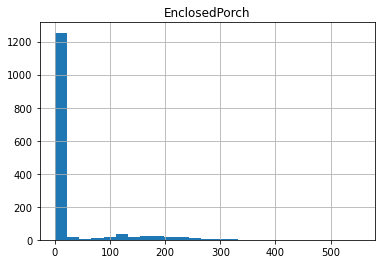

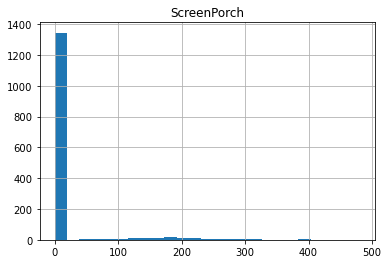

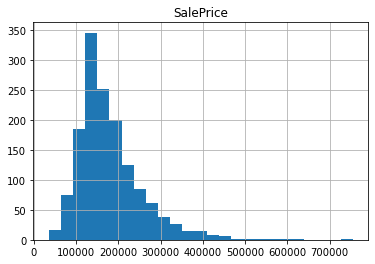

In [16]:
for feature in feature_continuous_numerical:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()
    

__Conclusion :__ Continuous features are not normally distributed so we have to convert it into the normal

distriution for the optimal machine learning model working 

As the values are skewed and has outliers

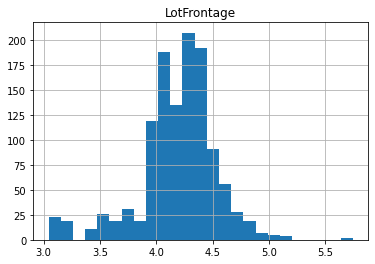

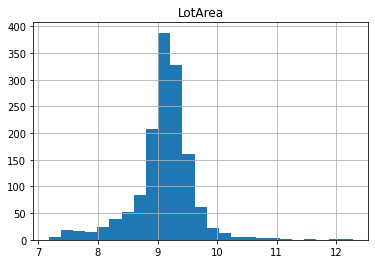

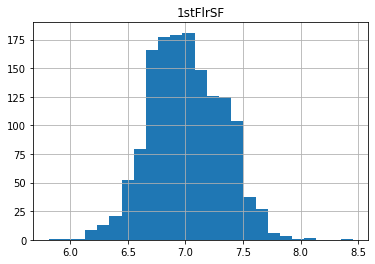

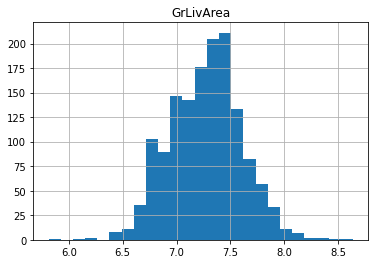

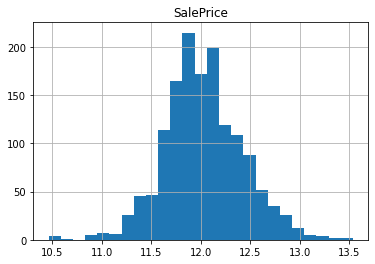

In [17]:
for feature in feature_continuous_numerical:
    data=df.copy()
    if(0 in data[feature].unique()):   # To overcome log0 or we can do +1 to data as this will
                                       # change 0 values to 1 and wont make much of the diffence to the data 
        pass
    else: 
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.title(feature)
        plt.show()

__Conclusion :__ The continuous features having the skewed values or non normal distribution data 

is now converted to the normal distribution by log normal transformation and hence also removed the outliers 

from the data

__Categorical Variables__

In [18]:
feature_categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
print('The length of categorical features are : ',len(feature_categorical))
print()
print(feature_categorical)

The length of categorical features are :  43

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
print('No of unique values in each features are : ')

for feature in feature_categorical:
    print(f'{feature} : {len(df[feature].unique())}')

No of unique values in each features are : 
MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6


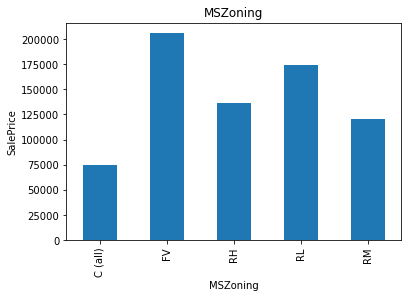

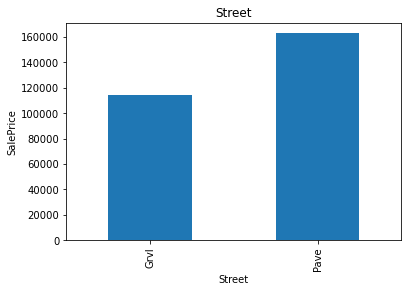

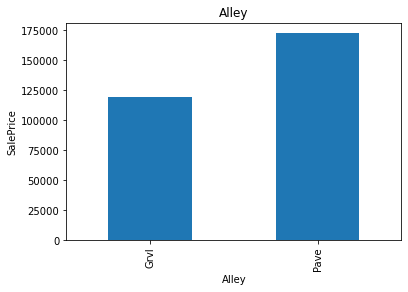

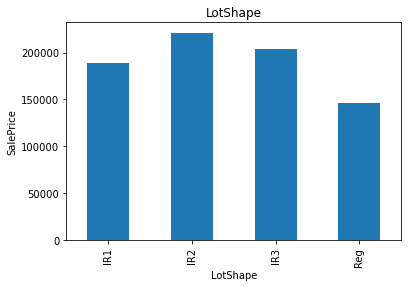

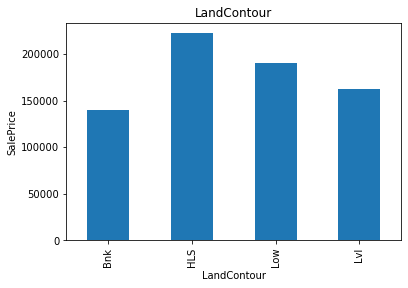

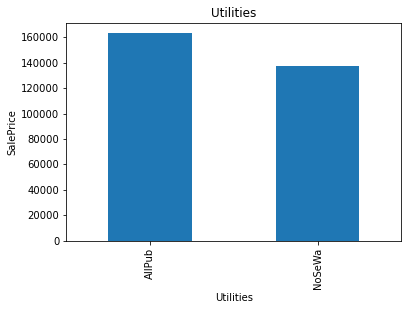

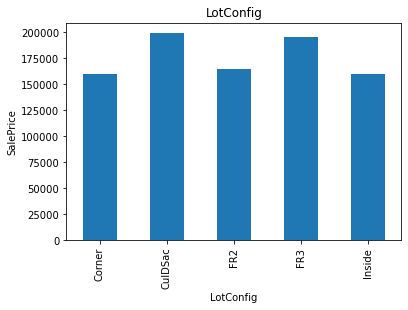

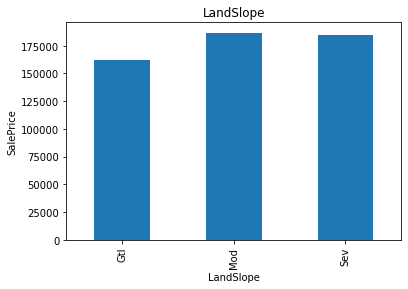

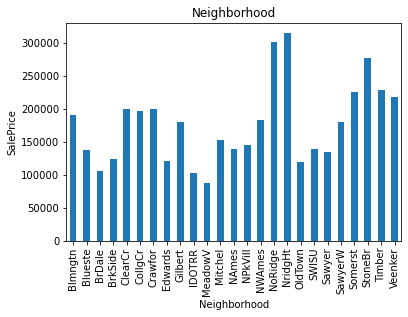

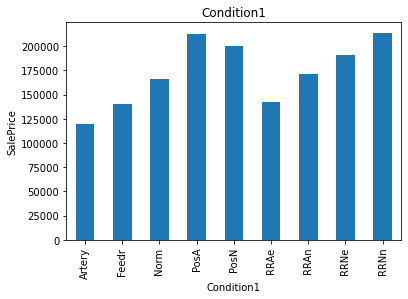

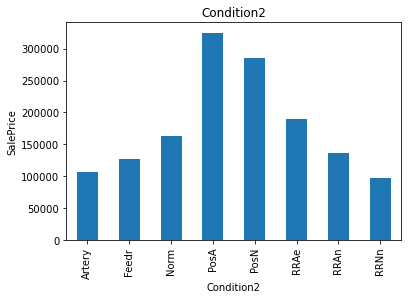

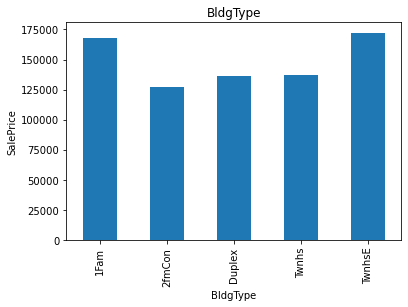

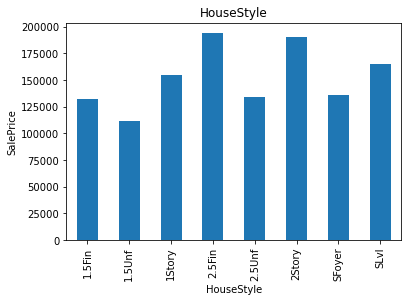

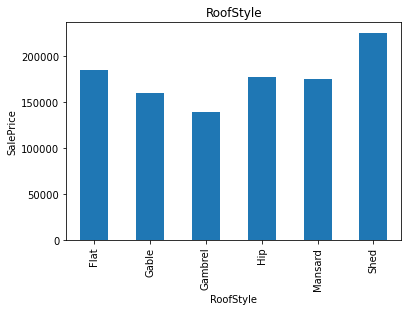

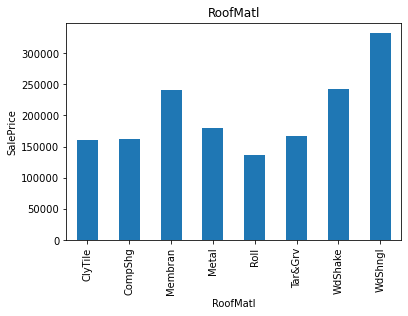

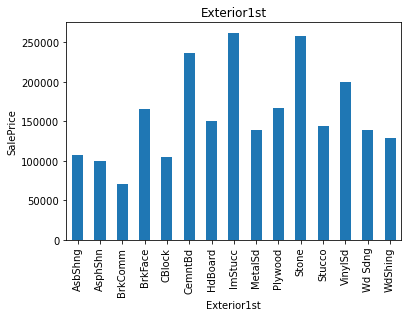

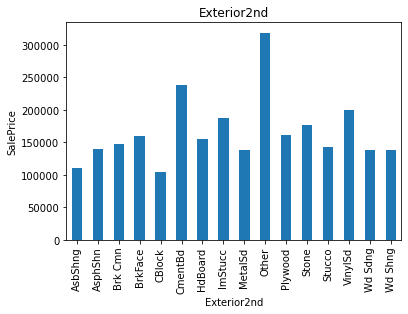

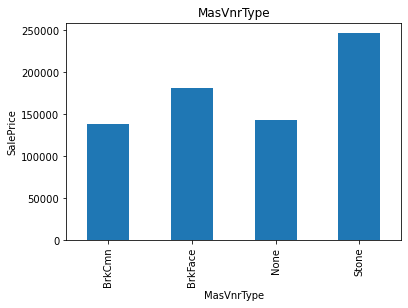

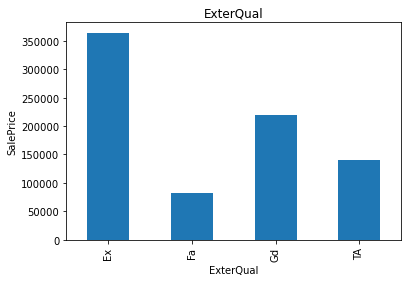

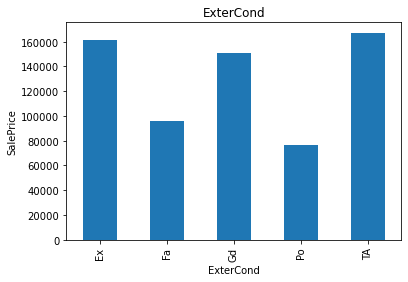

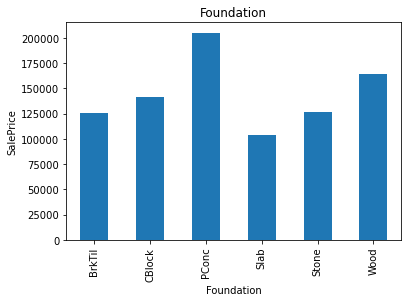

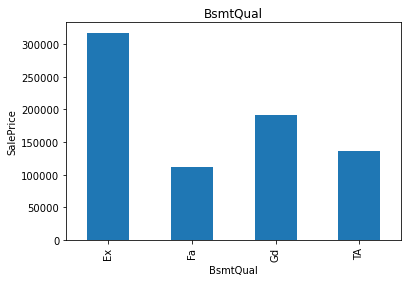

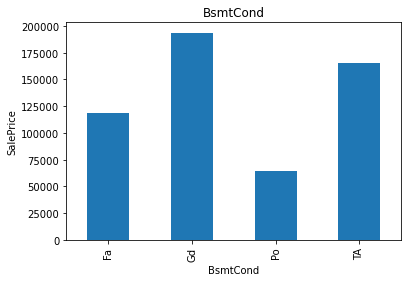

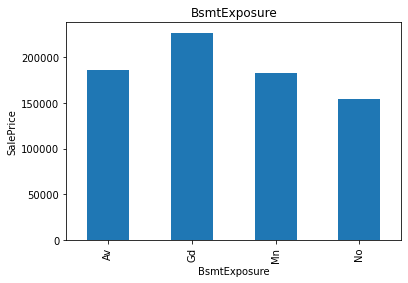

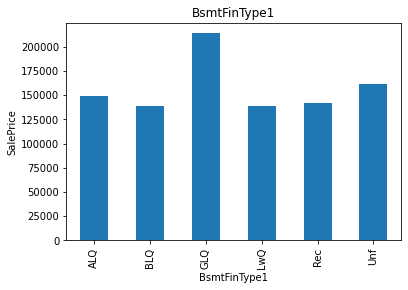

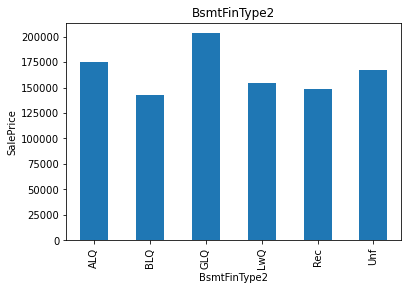

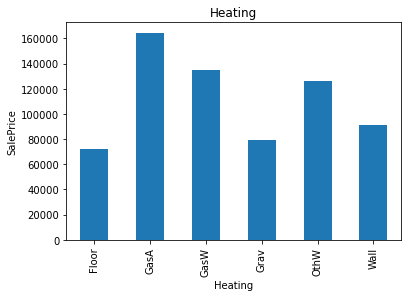

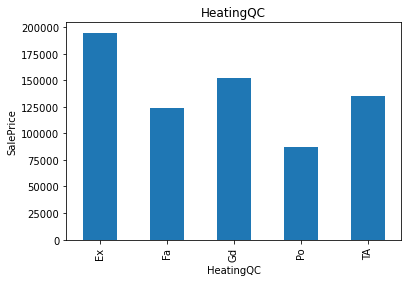

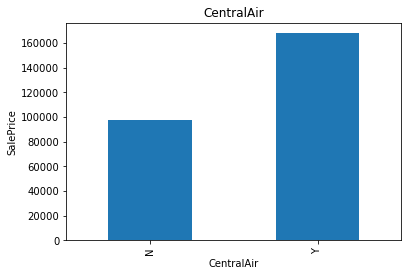

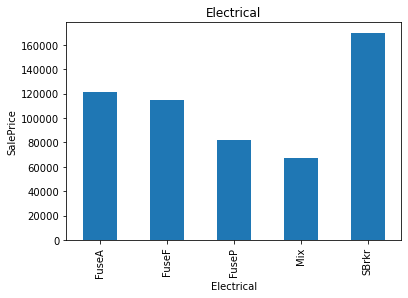

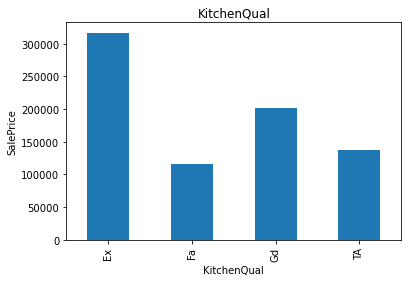

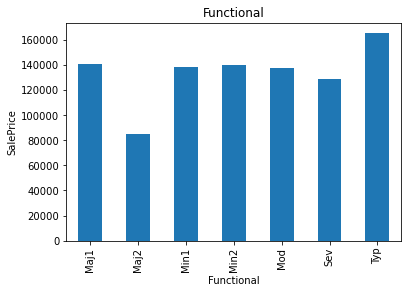

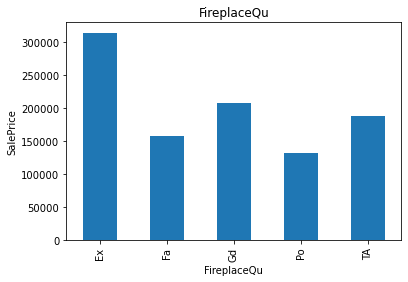

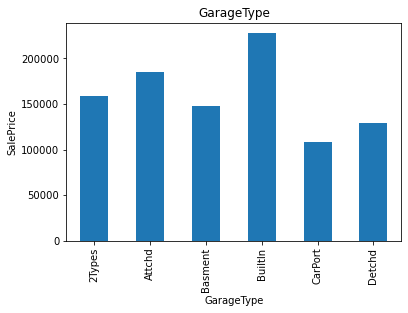

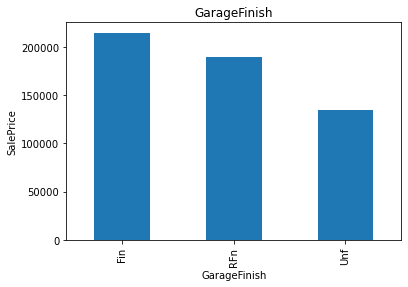

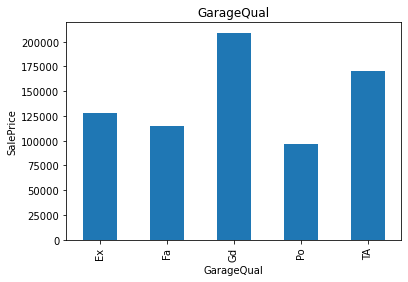

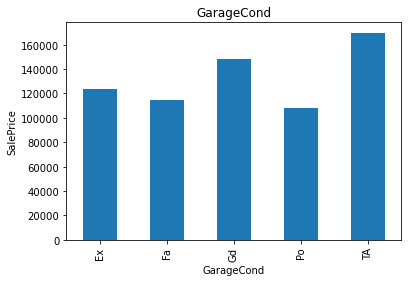

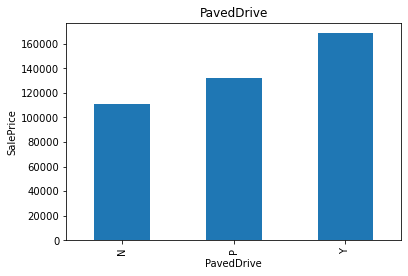

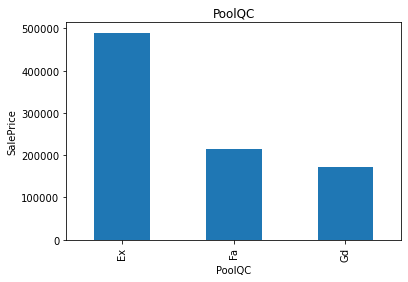

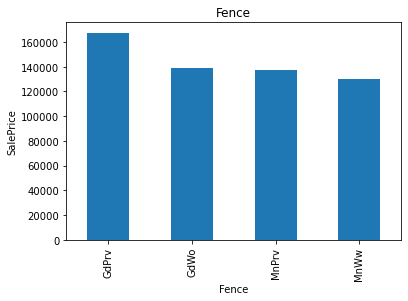

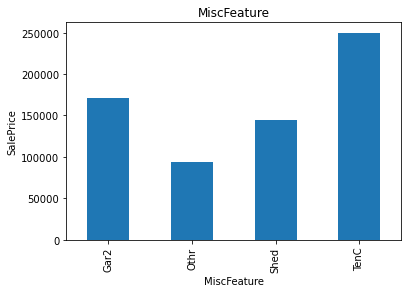

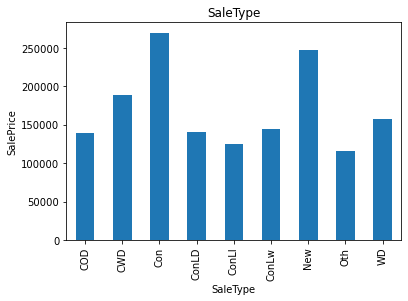

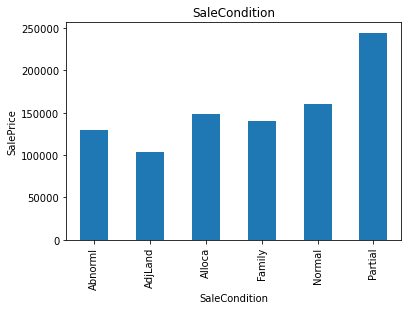

In [20]:
for feature in feature_categorical:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

__Conclusion :__  The analysis of the categorical data wrt to the target features 

and these features have to be converted into the numerical form to give to ML models

__Outliers__

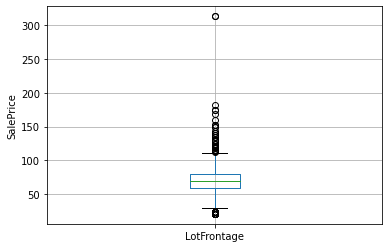

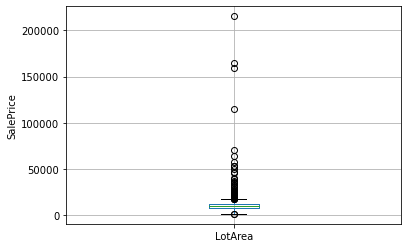

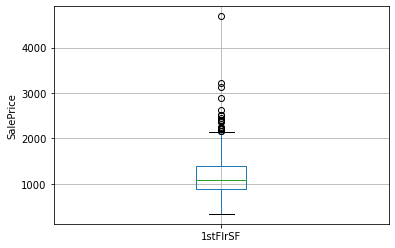

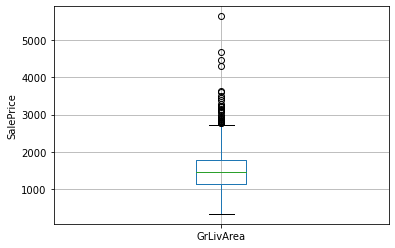

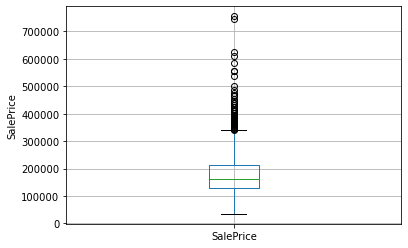

In [21]:
for feature in feature_continuous_numerical:
    if(0 in data[feature].unique()):
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel('SalePrice')
        plt.show()
    

__Conclusion :__ The outliers in the continuous numerical data as we can see from the box plot.

And it will be removed later by the log normal distribution and by this skewness of the data will also be fixed 